## 1. Data preparation and understanding

In [34]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
# set for better visual display of dataframe in notebooks
sb.set(rc={'figure.figsize': (10,6)}) 
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

# create a function to encode string values to ordinal values
def encode_mapping (map={},raw_data=[]):
    return [map[i] for i in raw_data]

#read the raw data file given and have a overview of its head
df=pd.read_csv('loan.csv',low_memory=False)
df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0,NaN,AZ,NaN,24000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,Borrower added on 12/22/11 > I need to upgra...,27.65,NaN,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,1077501,NaN,f,NaN,NaN,1,162.87,10.65%,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,NaN,1296599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,credit_card,n,0.00,13648,83.70%,B2,0.0,36 months,Computer,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,5863.155187,5833.84,863.16,0.00,5000.00,NaN,https://lendingclub.com/browse/loanDetail.acti...,Verified,NaN,860xx
1,0,NaN,GA,NaN,30000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,1.11,0.0,0,0,Borrower added on 12/22/11 > I plan to use t...,1.00,NaN,Apr-99,< 1 year,Ryder,2500,2500.0,C,RENT,1077430,NaN,f,NaN,NaN,5,59.83,15.27%,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,NaN,1314167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,car,n,117.08,1687,9.40%,C4,0.0,60 months,bike,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1008.710000,1008.71,435.17,0.00,456.46,NaN,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,309xx
2,0,NaN,IL,NaN,12252.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,NaN,8.72,NaN,Nov-01,10+ years,NaN,2400,2400.0,C,RENT,1077175,NaN,f,NaN,NaN,2,84.33,15.96%,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,NaN,1313524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,small_business,n,0.00,2956,98.50%,C5,0.0,36 months,real estate business,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,3005.666844,3005.67,605.67,0.00,2400.00,NaN,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,NaN,606xx
3,0,NaN,CA,NaN,49200.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,Borrower added on 12/21/11 > to pay for prop...,20.00,NaN,Feb-96,10+ years,AIR RESOURCES BOARD,10000,10000.0,C,RENT,1076863,NaN,f,NaN,NaN,1,339.31,13.49%,Dec-11,Apr-16,357.48,Jan-15,10000,Fully Paid,NaN,1277178,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,other,n,0.00,5598,21%,C1,0.0,36 months,personel,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,12231.890000,12231.89,2214.92,16.97,10000.00

##### => There are many N/A and 0 values columns, hence data cleaning should be focused at first stage

In [35]:
## get an overall view on data columns: describe
df.describe()

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,annual_inc_joint,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,funded_amnt,funded_amnt_inv,id,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,last_pymnt_amnt,loan_amnt,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,recoveries,revol_bal,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status_joint
count,39717.0,0.0,0.0,3.971700e+04,0.0,0.0,0.0,0.0,39661.0,39717.000000,39661.0,39717.000000,39717.0,39717.000000,0.0,39717.000000,39717.000000,3.971700e+04,0.0,0.0,0.0,39717.000000,39717.000000,39717.000000,39717.000000,0.0,3.971700e+04,0.0,0.0,0.0,0.0,0.0,14035.000000,0.0,2786.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39717.000000,0.0,0.0,0.0,0.0,0.0,0.0,39717.000000,39717.000000,0.0,0.0,39717.0,39717.000000,39020.000000,39717.000000,39717.000000,39678.0,0.0,0.0,0.0,39717.000000,0.0,0.0,0.0,0.0,0.0,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,0.0,0.0
mean,0.0,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,0.0,12.406112,0.0,0.146512,0.0,13.315130,NaN,10947.713196,10397.448868,6.831319e+05,NaN,NaN,NaN,0.869200,324.561922,2678.826162,11219.443815,NaN,8.504636e+05,NaN,NaN,NaN,NaN,NaN,35.900962,NaN,69.698134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.294408,NaN,NaN,NaN,NaN,NaN,NaN,51.227887,50.989768,NaN,NaN,1.0,0.055065,0.043260,95.221624,13382.528086,0.0,NaN,NaN,NaN,22.088828,NaN,NaN,NaN,NaN,NaN,12153.596544,11567.149118,2263.663172,1.363015,9793.348813,NaN,NaN
std,0.0,NaN,NaN,6.379377e+04,NaN,NaN,NaN,NaN,0.0,148.671593,0.0,0.491812,0.0,6.678594,NaN,7187.238670,7128.450439,2.106941e+05,NaN,NaN,NaN,1.070219,208.874874,4447.136012,7456.670694,NaN,2.656783e+05,NaN,NaN,NaN,NaN,NaN,22.020060,NaN,43.822529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.400282,NaN,NaN,NaN,NaN,NaN,NaN,375.172839,373.824457,NaN,NaN,0.0,0.237200,0.204324,688.744771,15885.016641,0.0,NaN,NaN,NaN,11.401709,NaN,NaN,NaN,NaN,NaN,9042.040766,8942.672613,2608.111964,7.289979,7065.522127,NaN,NaN
min,0.0,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.000000,0.0,0.000000,NaN,500.000000,0.000000,5.473400e+04,NaN,NaN,NaN,0.000000,15.690000,0.000000,500.000000,NaN,7.069900e+04,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.0,NaN,NaN,4.040400e+04,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.000000,0.0,8.170000,NaN,5400.000000,5000.000000,5.162210e+05,NaN,NaN,NaN,0.000000,167.020000,218.680000,5500.000000,NaN,6.667800e+05,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.0,0.000000,0.000000,0.000000,3703.000000,0.0,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,5576.930000,5112.310

In [36]:
## get an overall view on data columns: info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, acc_now_delinq to zip_code
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


## 2. Data manipulation
### 2a. Data cleaning

In [37]:
## drop un-useful columns where each has all values of 0, by filtering them out and take the valid columns only
df=df.loc[:,~df.eq(0).all()]
df.dropna(axis=1,how='all',inplace=True)

In [38]:

# clean emp_lenght and encode it into numeric values, because it is logically important to the loan profiles
r_map={'10+ years':10,'9 years':9 ,'8 years':8 , '7 years':7,'6 years':6,'5 years':5,'4 years':4,'3 years':3 ,'2 years':2,'1 year':1,  '< 1 year':0.5,0:0}
df['emp_length']=df['emp_length'].fillna(0)
df['emp_length_enc'] = encode_mapping(r_map,df['emp_length'].values)

In [39]:
## check null values in columns
df_null_values = df.isnull().sum()
null_col = df_null_values[(df_null_values>0)==True].index.to_list()
for col in null_col:
    print('------',col,'---------------')
    print(df[col].value_counts())

------ chargeoff_within_12_mths ---------------
chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64
------ collections_12_mths_ex_med ---------------
collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64
------ desc ---------------
desc
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

##### => Many columns have null(N/A) and 0 values. After assessing them, they are not really logically contributing much to the problem of charged off loans. Therefore, we can remove them for noise reduction

In [40]:

# drop null columns
df.drop(columns=null_col,inplace=True)

# remove all 0 columns after filtering
df = df.loc[:,~df.eq(0).all()]

## check again the null values in columns
df_null_values = df.isnull().sum()
df_null_values.sum()

0

##### => No null column with all N/A or all 0 values is available

### 2b. Data encoding for numeric calculation

In [41]:

#convert int_rate from string to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(str(x).split("%")[0]))

# convert the important text attributes into ordinal data attributes
r_map = {'Fully Paid':3,'Current':2,'Charged Off':1 } # the default which charged off is at lowest value 
df['loan_status_enc'] =encode_mapping(r_map,df['loan_status'].values)

# convert text attributes to ordinal number for better correlation analysis
r_map={'OWN':4, 'MORTGAGE':3, 'RENT':2, 'OTHER':1, 'NONE':0} # the more assets, the higher numeric value
df['home_ownership_enc'] = encode_mapping(r_map,df['home_ownership'].values)

r_map={'A':7, 'B':6, 'C':5, 'D':4, 'E':3, 'F':2, 'G':1} # the higher grade, the higher numeric value
df['grade_enc'] = encode_mapping(r_map,df['grade'].values)

r_map = {'Source Verified':3,'Verified':2,  'Not Verified':1} # the more reliable source verified, the higher numeric value
df['verification_status_enc'] = encode_mapping(r_map,df['verification_status'].values)

#check each column's data type
list_col=[]
for i in df.columns.to_list():
    list_col.append({'col':i,'unique_values':len(df[i].unique()),'dtype':df[i].dtype})
df1=pd.DataFrame(list_col).sort_values('dtype',axis=0,ascending=1).reset_index(drop=True)
#remove irrelevant columns
col_2drop=['initial_list_status','application_type','policy_code','pymnt_plan','url','id','member_id']
df.drop(col_2drop,axis=1,inplace=True)

#calc ratio of total paid amount per total loan amount to see the progress of payment 
df['Paid_ratio']=df['total_pymnt']/df['loan_amnt']*100
#only take numberic columns and calculate the correlation across columns
df_numeric = df.loc[:,df.dtypes!='object']

## 3. Problem (Charged off) understanding 

### 3a. Problem sorted out

loan_status
Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: count, dtype: float64


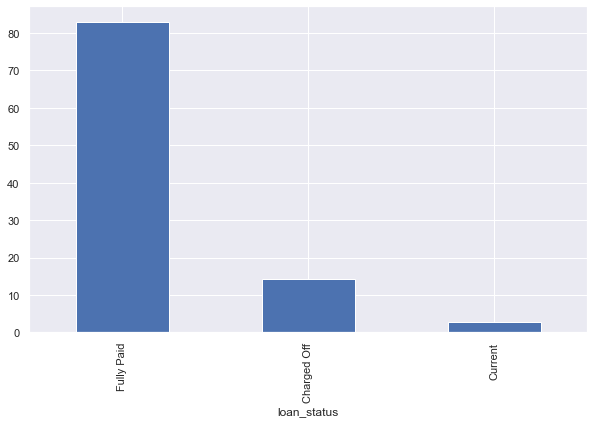

In [42]:
## have overview look on the key variable "loan_status" to understand this uni-variable in term of loan cases quantity
loan_quantity_contribution = df['loan_status'].value_counts()/len(df['loan_status'])*100
loan_quantity_contribution.plot.bar()
plt.grid(True)
print(loan_quantity_contribution)

loan_status
Charged Off    15.285227
Current         4.362979
Fully Paid     80.351794
Name: loan_amnt, dtype: float64


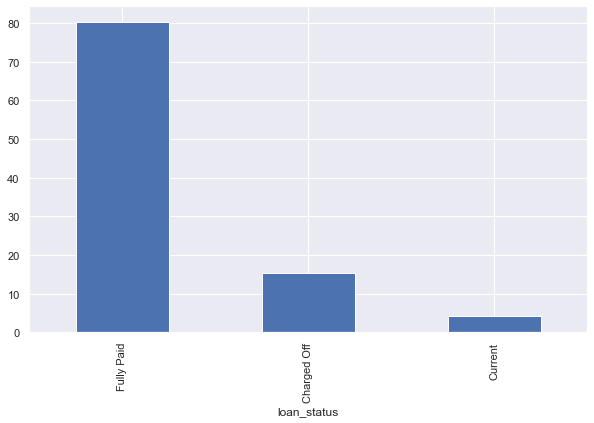

In [43]:
## have overview look on the key variable "loan_status" to understand this uni-variable in term of loan amount
loan_amount_contribution = df.groupby('loan_status')['loan_amnt'].sum()/df['loan_amnt'].sum()*100
loan_amount_contribution.sort_values(ascending=False).plot.bar()
plt.grid(True)
print(loan_amount_contribution)

##### => There are around 14-15% total loan cases and loan amounts are charged off, which are contributing much on the business loss

### 3b. Problem analysis

#### * Evaluate correlation relationship between Loan_status and other factors

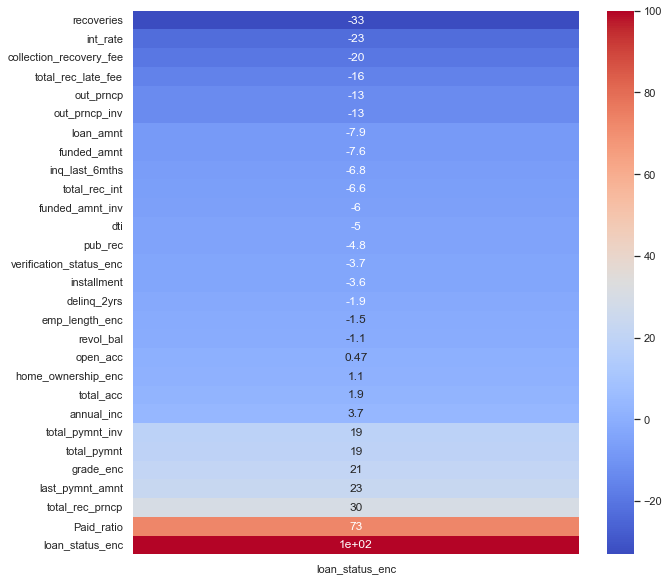

In [49]:
# get the correlation matrix
df_corr = df_numeric.corr()
# filter the correlation of loan_status vs others
loan_status_corr=df_corr.loc[:,['loan_status_enc']].sort_values('loan_status_enc')*100
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(loan_status_corr,annot=True,cmap='coolwarm',  cbar=True)
plt.show()

##### => overall, there are positive relationship between total payment received and loan status, the more we receive the better loan status. It means, the less amount we have received, the more likely there are charged off or default cases. Similarly, there are negative relationship between total collection recovery fees or late payment received and loan status. But, those payments or fees are related to past and current loans. Then, we can apply proper solutions like risk-alert for those payment-related risks for next loan approvals or loan extension. Besides, there are risks associated with the grade of profile and those loans with high interest rate (but not strong) as following more detailed views.

#### * Evaluate the contribution of the Loan "purpose" to "Charged off"

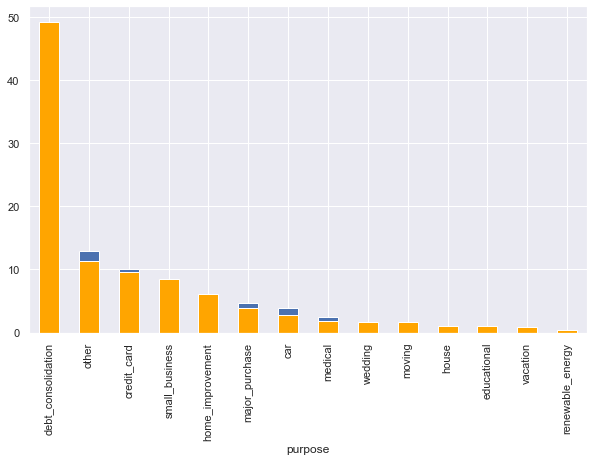

                    Total_Loan  Charged_Off
purpose                                    
debt_consolidation   46.934562    49.173627
credit_card          12.916383     9.632131
other                10.053629    11.249334
home_improvement      7.493013     6.166696
major_purchase        5.506458     3.945264
small_business        4.602563     8.441443
car                   3.900093     2.843433
wedding               2.384369     1.706060
medical               1.744845     1.883775
moving                1.467885     1.634974
vacation              0.959287     0.941887
house                 0.959287     1.048516
educational           0.818289     0.995202
renewable_energy      0.259335     0.337658


In [44]:
## have overview look on the key variable "loan_status" to understand this uni-variable
# df=  df[df['loan_status']=='Fully Paid'].copy()
loan_quantity_contribution = df['purpose'].value_counts()/len(df['loan_status'])*100
loan_quantity_contribution.plot.bar()
df1=  df[df['loan_status']=='Charged Off'].copy()
loan_chargedOff_contribution = df1['purpose'].value_counts()/len(df1['loan_status'])*100
loan_chargedOff_contribution.plot.bar(color='orange')
plt.grid(True)
plt.show()
print(pd.concat([loan_quantity_contribution,loan_chargedOff_contribution],axis=1,keys=['Total_Loan','Charged_Off']))

##### => There is no abnormal contribution from each purpose to the charged off. The allocation for purposes are similar between Total loans and charged off leans.

#### * Evaluate the contribution of the Loan "term" to "Charged off"

In [45]:
## have overview look on the key variable "term" to understand this uni-variable

terms_contribution = df['term'].value_counts()/len(df['loan_status'])*100
df1=  df[df['loan_status']=='Charged Off'].copy()
loan_chargedOff_contribution = df1['term'].value_counts()/len(df1['loan_status'])*100
df_conso=pd.concat([terms_contribution,loan_chargedOff_contribution],axis=1,keys=['Total_Loan','Charged_Off'])

print(df_conso)

            Total_Loan  Charged_Off
term                               
 36 months   73.258302    57.348498
 60 months   26.741698    42.651502


##### => Term 60 months has higher chance of "charged off" around 18% comparing to overall loans

#### * Evaluate the contribution of the Loan "grade" to "Charged off"

In [46]:
## have overview look on the key variable "term" to understand this uni-variable

grade_contribution = df['grade_enc'].value_counts()/len(df['loan_status'])*100
df1=  df[df['loan_status']=='Charged Off'].copy()
loan_chargedOff_contribution = df1['grade_enc'].value_counts()/len(df1['loan_status'])*100
print(pd.concat([grade_contribution,loan_chargedOff_contribution],axis=1,keys=['Total_Loan','Charged_Off']).sort_index())

           Total_Loan  Charged_Off
grade_enc                         
1            0.795629     1.794917
2            2.641186     5.669095
3            7.155626    12.706593
4           13.362036    19.868491
5           20.389254    23.938155
6           30.264119    25.324329
7           25.392149    10.698418


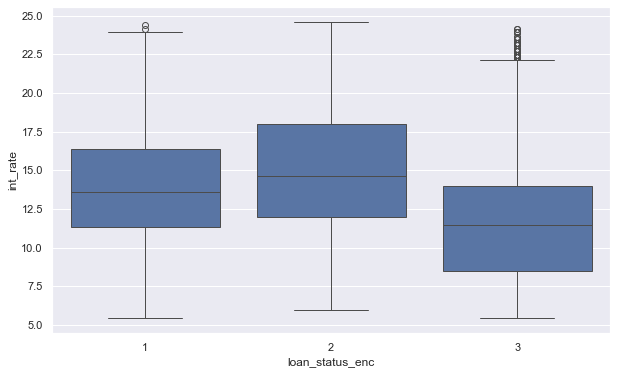

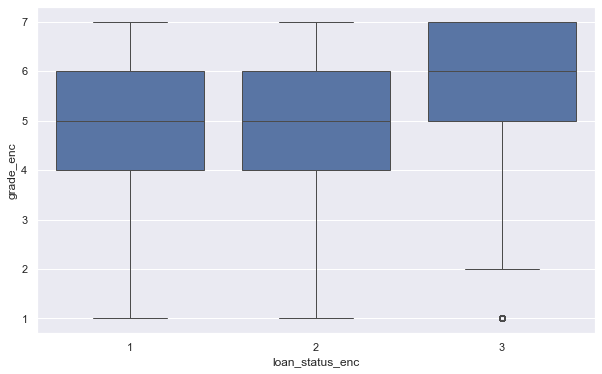

In [47]:
sb.boxplot(df_numeric[['loan_status_enc','int_rate']],x='loan_status_enc',y='int_rate')
plt.show()
sb.boxplot(df_numeric[['loan_status_enc','grade_enc']],x='loan_status_enc',y='grade_enc')
plt.show()


##### => Charged off loans are : more likely at higher interest rate loans, and less likely at the higher grade (more reliable with more assets) profiles